# Finite Difference Method

In [28]:
from cmath import pi, sin
import math
import numpy as np
import matplotlib.pyplot as plt

In [29]:
print("henry")

henry


In [30]:

endpt = 1.0 #endpoint for u(0,t) = u(l,t) = 0
maxT = 1.0 # maxtimefor 0 < t < maxT
alpha = 1 #constant in wave eq
m = 40 # number of intervals in the x dimension, >= 2
n = 40 # num of intervals in the time directon

h = endpt/m #step size for x
k = maxT/n #step size for t
lamb = (alpha*k)/h



#define our function f(x) = U(x,0)
def iF(Xin):
    Yout = math.sin((2*math.pi)*Xin)  #define our function here
    return(Yout)      

#define our function g(x) = du/dt(x,0)

def functG(Xin):
    Yout = (2*(math.pi))*(math.sin((2*math.pi)*Xin))
    return(Yout)        


wMat =  np.zeros([m+1,n+1]) #initialize our m+1 x n+1 finite difference matrix ((x,t)).

#Impose boundary conditions (note we miss j = 0)
for j in range(1,n+1,1):
    wMat[0,j] = 0
    wMat[m,j] = 0

#impose conditions for f(x) = U(x,0)
wMat[0,0] = iF(0)
wMat[m,0] = iF(endpt)

for i in range(1,m,1): #initialize for t = 0 and t = k, the first step
    wMat[i,0] = iF(i*h)
    wMat[i,1] = (1-(lamb**2))*iF(i*h) + ((lamb**2)/2)*(iF(i*h + h) + iF(i*h -h)) + k*(functG(i*h))

#now we do matrix multiplication
for j in range(1,n,1):
    for i in range(1,m,1):
        wMat[i,j+1] = 2*(1-(lamb**2))*(wMat[i,j]) + (lamb**2)*(wMat[i+1,j] + wMat[i-1,j]) - wMat[i,j-1]

newx = np.array([])
newt = np.array([])
newy = np.array([])

#now we create our output with two nested for-loops
for j in range(0,n+1,1):    
     t = j*k                        #scale our t
     for i in range(0,m+1,1):       
        x = i*h                     #scale our x
        newx = np.append(newx,x)
        newt = np.append(newt,t)
        newy = np.append(newy, wMat[i,j])

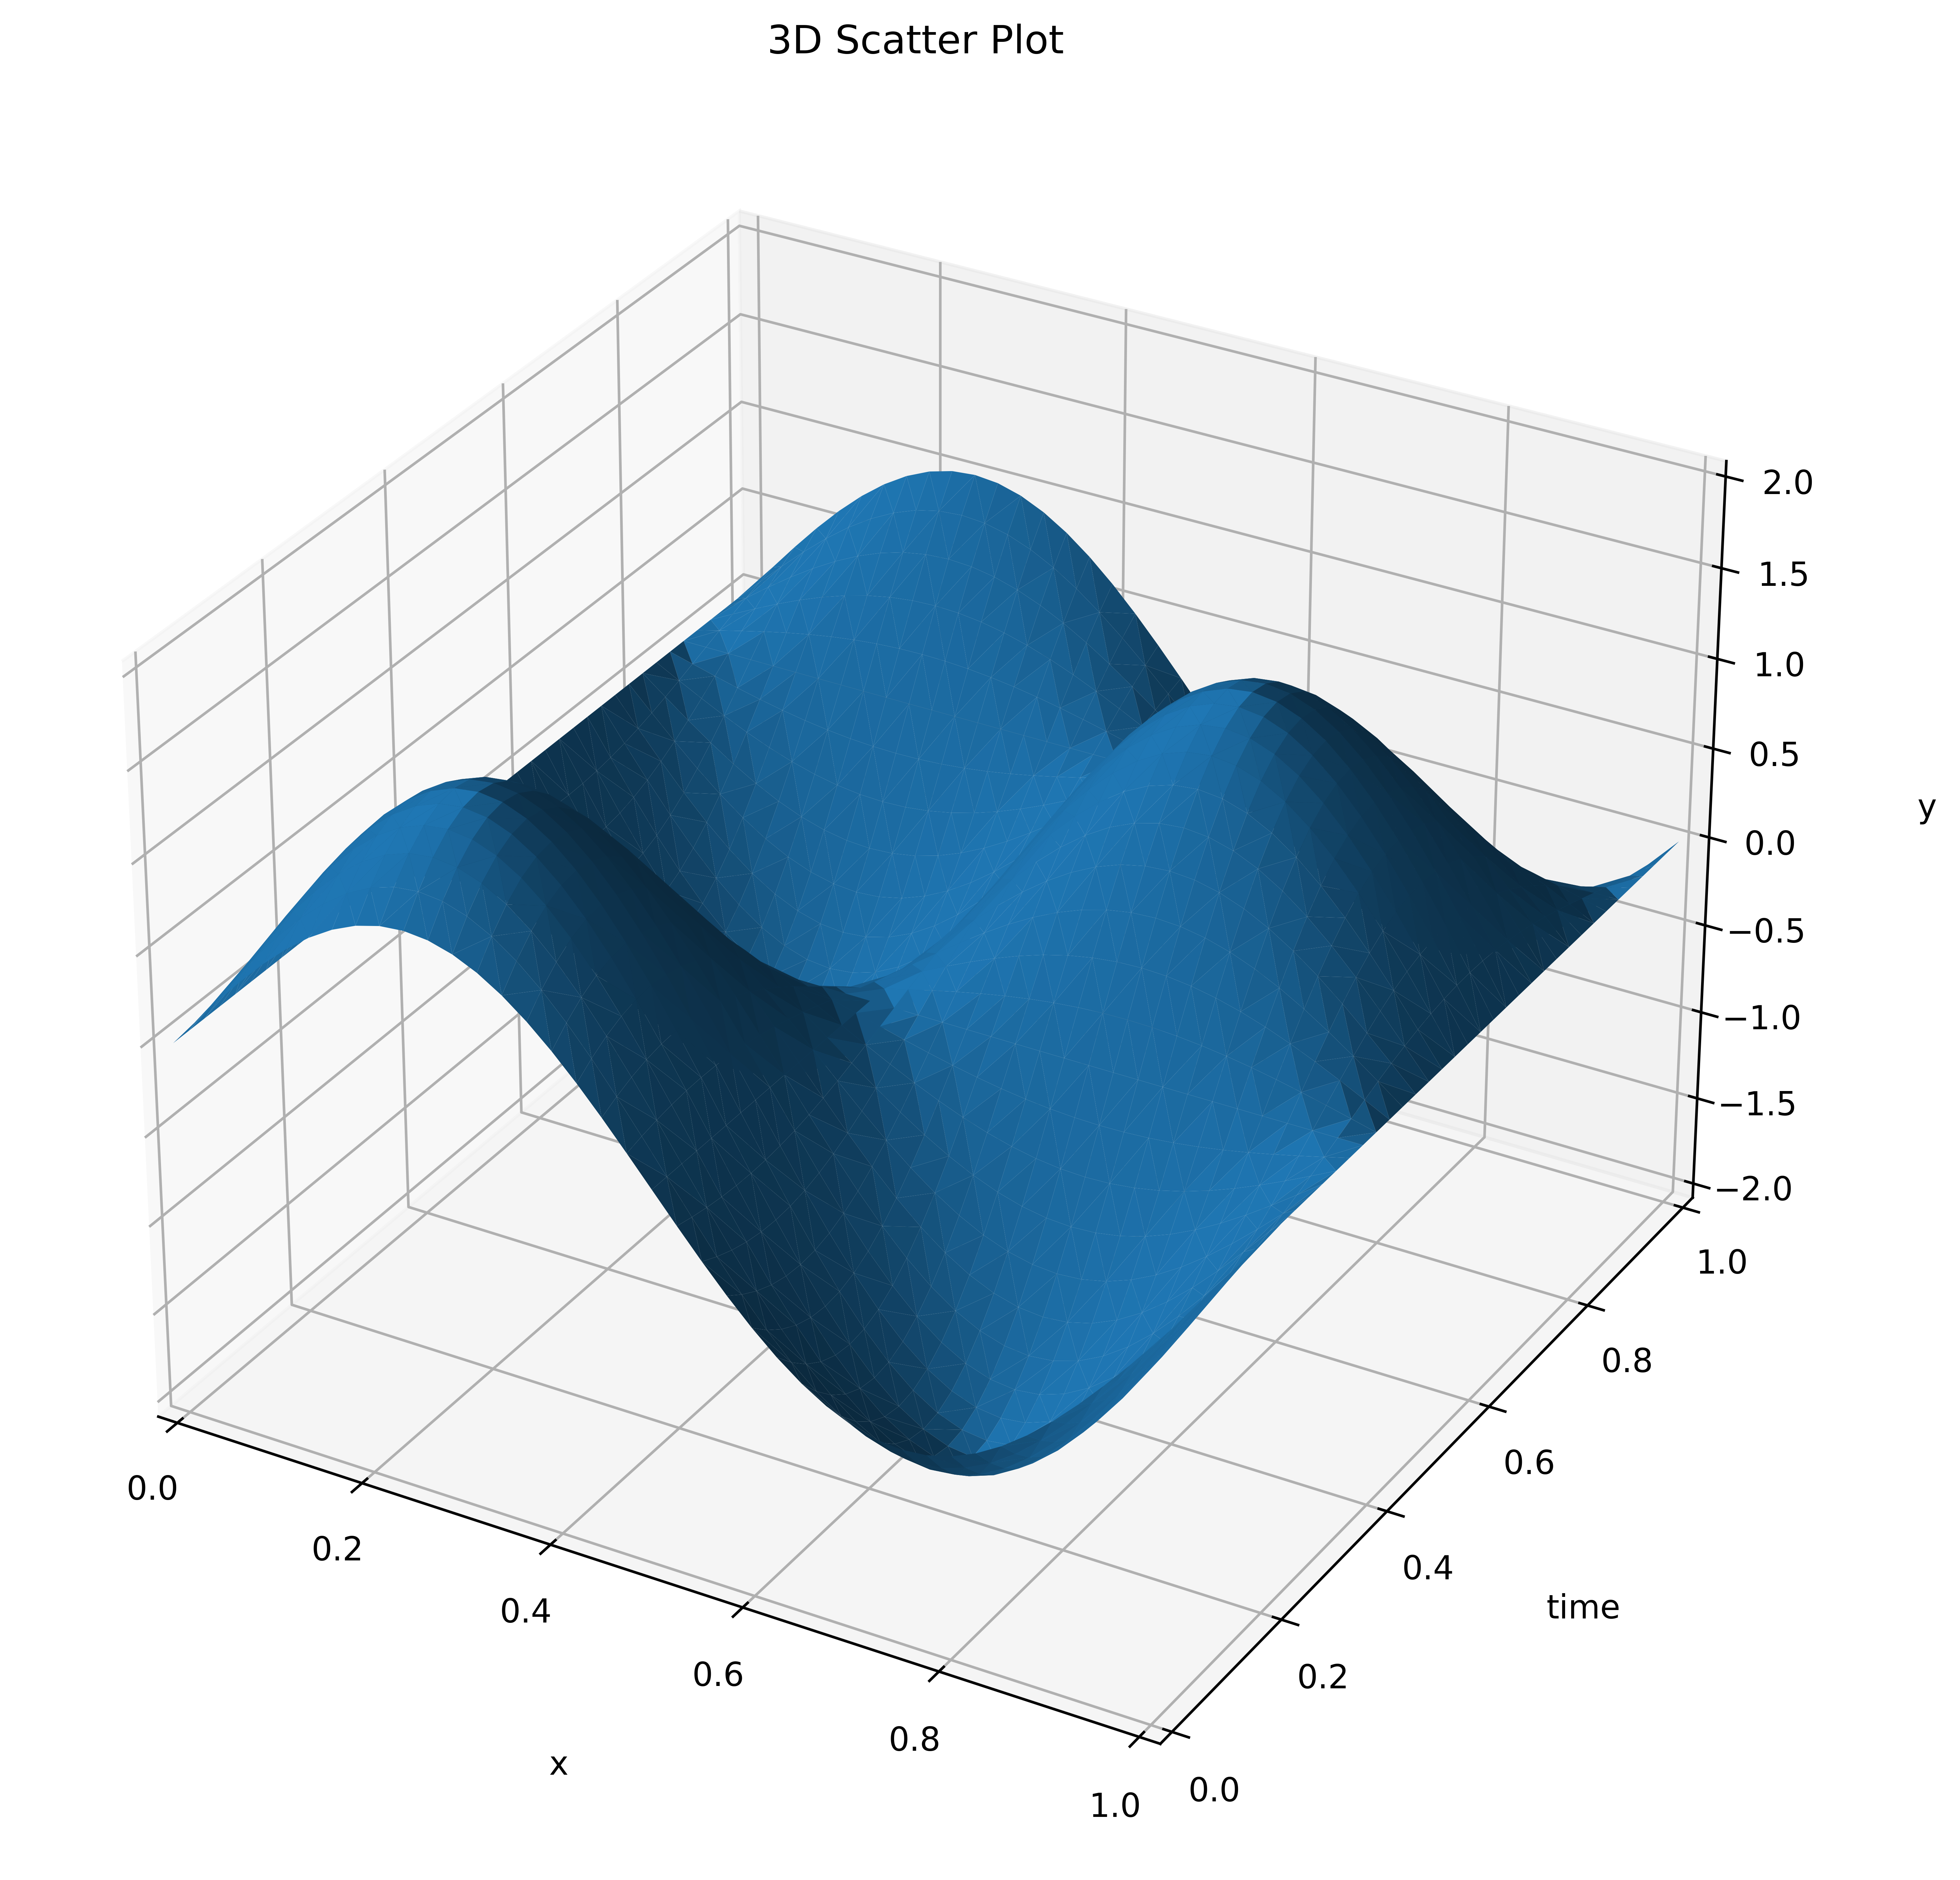

In [31]:
#now do some plotting
figbl = plt.figure(figsize = (10,10),dpi=700)
axbl = plt.axes(projection='3d')
axbl.grid()




#axbl.scatter(finalxlist,finalylist, np.divide(time_array,60), c = 'r', s = 10.) #this one works
axbl.plot_trisurf(newx, newt, newy)
#axbl.scatter(totalX,totalY,totaloverdue,c='k',s=10)
axbl.set_title('3D Scatter Plot')

# Set axes label
axbl.set_xlabel('x', labelpad=20)
axbl.set_ylabel('time', labelpad=20)
axbl.set_zlabel('y', labelpad=20)
axbl.axes.set_xlim3d(left = 0, right = 1)
axbl.axes.set_ylim3d(bottom = 0, top = 1)
axbl.axes.set_zlim3d(bottom = -2, top = 2)

#axbl.plot3D(xloc, yloc, times)
plt.show()

# Now we compare to the actual solution from the text

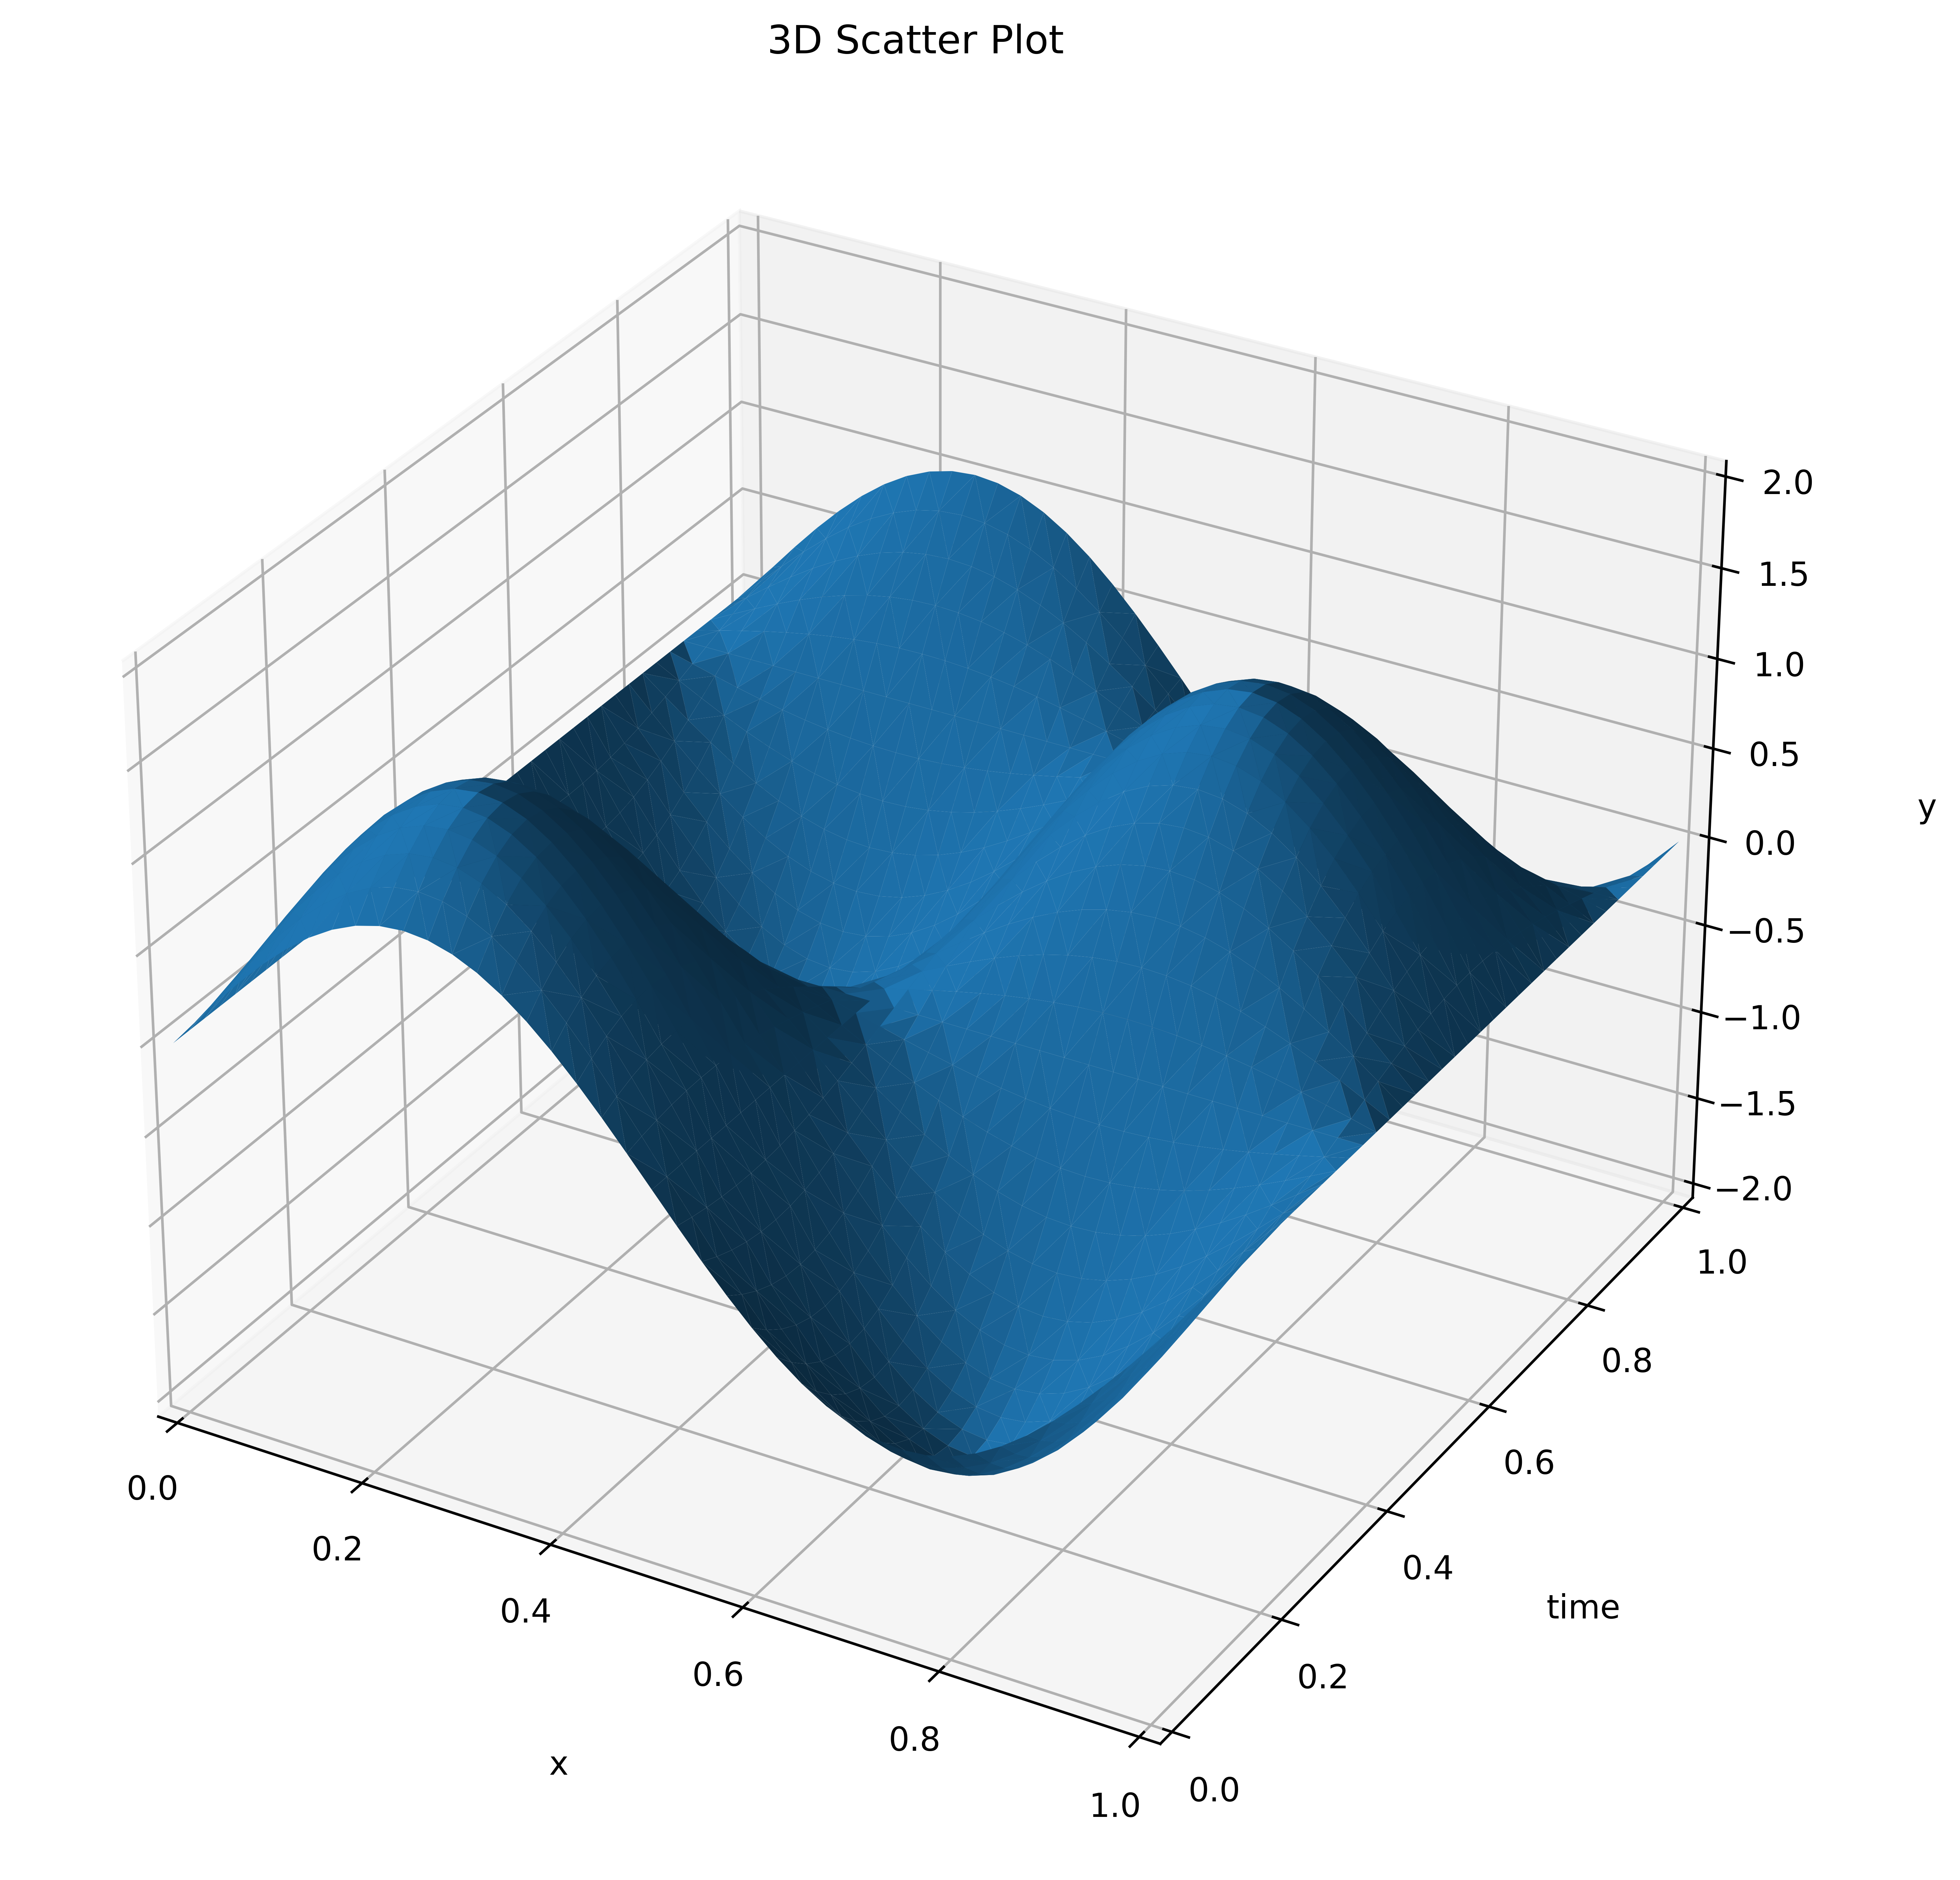

In [32]:
figbl = plt.figure(figsize = (10,10),dpi=700)
axbl = plt.axes(projection='3d')
axbl.grid()

actualsol = (np.sin(2*np.pi*newx)) * (np.cos(2* np.pi * newt) + np.sin(2 * np.pi * newt))


#axbl.scatter(finalxlist,finalylist, np.divide(time_array,60), c = 'r', s = 10.) #this one works
axbl.plot_trisurf(newx, newt, actualsol)
#axbl.scatter(totalX,totalY,totaloverdue,c='k',s=10)
axbl.set_title('3D Scatter Plot')

# Set axes label
axbl.set_xlabel('x', labelpad=20)
axbl.set_ylabel('time', labelpad=20)
axbl.set_zlabel('y', labelpad=20)
axbl.axes.set_xlim3d(left = 0, right = 1)
axbl.axes.set_ylim3d(bottom = 0, top = 1)
axbl.axes.set_zlim3d(bottom = -2, top = 2)

#axbl.plot3D(xloc, yloc, times)
plt.show()

### Calculate the MSE for all data points

In [33]:
print(np.average((newy-actualsol)**2))

4.0473666279805005e-06
